# 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings #경고문구 무시
warnings.filterwarnings(action='ignore')

# csv파일 불러오기와서 데이터 전처리

In [3]:
df=pd.read_csv('./전처리 데이터/증권4개년_3차프로젝트.csv')

In [4]:
df.head()

Unnamed: 0  Unnamed: 0.1                         제목                 작성시간
0           0             0           인사 국민연금공단 기금운용본부  2017-01-01 22:53:00
1           1             1    국민연금 기금운용본부 운용전략실장에 이수철  2017-01-01 21:37:00
2           2             2    금리 오르면 사모펀드에 투자기회 늘어날 것  2017-01-01 19:45:00
3           3             3   마켓인사이트 KB증권 JW바이오 지분  인수  2017-01-01 19:41:00
4           4             4  증권사 이달부터 ELS 헤지자산 구분 관리해야  2017-01-01 19:39:00

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True) 

In [7]:
df.drop('Unnamed: 0.1', axis=1, inplace=True) 

In [9]:
df.head()

제목                 작성시간
0           인사 국민연금공단 기금운용본부  2017-01-01 22:53:00
1    국민연금 기금운용본부 운용전략실장에 이수철  2017-01-01 21:37:00
2    금리 오르면 사모펀드에 투자기회 늘어날 것  2017-01-01 19:45:00
3   마켓인사이트 KB증권 JW바이오 지분  인수  2017-01-01 19:41:00
4  증권사 이달부터 ELS 헤지자산 구분 관리해야  2017-01-01 19:39:00

### null 값 확인 후 제거

In [10]:
df.isnull().sum()

제목      5
작성시간    0
dtype: int64

In [11]:
df.fillna('0', inplace=True)

In [12]:
df.isnull().sum()

제목      0
작성시간    0
dtype: int64

In [13]:
df[['형태소','점수']]=0 #형태소, 점수칼럼추가
df.head()

제목                 작성시간  형태소  점수
0           인사 국민연금공단 기금운용본부  2017-01-01 22:53:00    0   0
1    국민연금 기금운용본부 운용전략실장에 이수철  2017-01-01 21:37:00    0   0
2    금리 오르면 사모펀드에 투자기회 늘어날 것  2017-01-01 19:45:00    0   0
3   마켓인사이트 KB증권 JW바이오 지분  인수  2017-01-01 19:41:00    0   0
4  증권사 이달부터 ELS 헤지자산 구분 관리해야  2017-01-01 19:39:00    0   0

# 감성어 사전 불러오기

In [14]:
knu = pd.read_csv("SentiWord_Dict.txt", engine="python",header=None, sep='\t')
knu.iloc[14850,0]='갈등'
knu.iloc[14850,1]=float(-1)
knu

0    1
0        (-;  1.0
1      (;_;) -1.0
2       (^^)  1.0
3      (^-^)  1.0
4       (^^*  1.0
...      ...  ...
14850     갈등 -1.0
14851     의혹 -1.0
14852  내팽개치다 -2.0
14853     횡령 -2.0
14854    불안증 -2.0

[14855 rows x 2 columns]

# 증권 감정어사전 불러오기

In [19]:
pos=pd.read_excel('./KNU감성사전.xlsx' ,sheet_name='긍정어') #긍정어,부정어,중립어사전 열기
neg=pd.read_excel('./KNU감성사전.xlsx' ,sheet_name='부정어')

In [20]:
pos

단어  점수
0       (-;   1
1      (^^)   1
2     (^-^)   1
3      (^^*   1
4     (^_^)   1
...     ...  ..
4863    안정감   1
4864  적극적이다   1
4865     승리   1
4866   승리하다   1
4867   유명하다   1

[4868 rows x 2 columns]

In [21]:
neg

단어  점수
0         가난  -1
1       가난뱅이  -1
2       가난살이  -1
3     가난살이하다  -1
4       가난설음  -1
...      ...  ..
9822     비리를  -1
9823      의혹  -1
9824   내팽개치다  -1
9825      횡령  -1
9826     불안증  -1

[9827 rows x 2 columns]

In [22]:
pos_list=[]
for i in pos['단어']:
    pos_list.append(i)
     
neg_list=[]
for i in neg['단어']:
    neg_list.append(i)

In [23]:
print(pos_list) #단어들 확인
print(neg_list)

['(-;', '(^^)', '(^-^)', '(^^*', '(^_^)', '(^o^)', '*^^*', '/^o^\\', ':(', ":'-(", ':-(', ':-)', ':|', ';', ';)', ';-)', '^///^', '^^', '^^//', '<3', '=)', 'XD', 'ㄱㅅ', 'ㄱㅇㄷ', '가격이 싸다', '가까이 사귀어', '가까이하다', '가다듬어', '가다듬어 수습하는', '가다듬어 수습하다', '가다듬어 정하다', '가당히', '가뜬하게', '가라앉혀 바로잡다', '가르치며', '가르침', '가벼운 마음으로', '가볍게 웃다', '가볍고', '가볍고 보드랍게', '가분가분', '가분히', '가뿐가뿐', '가뿐가뿐하다', '가뿐가뿐히', '가뿐하게', '가뿐하다', '가뿐한', '가뿐한 느낌', '가뿐한 느낌이', '가뿐히', '가장 중요한', '가지런하게 하는', '가지런하게 하다', '가지런하다', '가치', '가치가', '가치있는', '각별나다', '각별하다', '간직하다', '감각적이다', '감당하다', '감동시킬', '감동시킬 만한', '감모', '감싸고', '감정이 북받쳐', '강렬하게', '강세', '강인하다', '강하게', '강하게 하다', '강하고', '강하다', '강화하다', '갖추다', '개선하고', '개성', '개성있는', '개성있다', '갠소', '갸륵한', '갸륵한 데가', '갸름하다', '거리낌 없이', '거짓 없다', '거짓없다', '거침없이', '거침이 없는', '걱정이 없는', '건강에 긍정적인', '건둥건둥', '건둥건둥하다', '검소하다', '겉면이 매끄럽고', '겉모양의 아름다움과', '격려되다', '격려하다', '격식에 맞아', '견고하다', '견디어 내다', '견줄 수 없을 정도로', '결점이 없도록', '겸손하게', '겸손하게 이르는', '겸손하고', '경건한', '경험이 많고', '고상하고', '고상한 남자', '고상한 이야기', '고요하게', '고요하게 함', '고요하고', '고요함',

# 형태소분석 -mecab사용

In [24]:
from konlpy.tag import Mecab
mecab=Mecab(dicpath='C:/mecab/mecab-ko-dic')

In [34]:
pos

단어  점수
0       ▲   1
1       △   1
2       ↑   1
3     MOU   1
4      간다   1
..    ...  ..
128    효능   1
129    휩쓰   1
130    흑자   1
131  흑자전환   1
132    흥행   1

[133 rows x 2 columns]

In [25]:
list(pos['단어']) 

['(-;',
 '(^^)',
 '(^-^)',
 '(^^*',
 '(^_^)',
 '(^o^)',
 '*^^*',
 '/^o^\\',
 ':(',
 ":'-(",
 ':-(',
 ':-)',
 ':|',
 ';',
 ';)',
 ';-)',
 '^///^',
 '^^',
 '^^//',
 '<3',
 '=)',
 'XD',
 'ㄱㅅ',
 'ㄱㅇㄷ',
 '가격이 싸다',
 '가까이 사귀어',
 '가까이하다',
 '가다듬어',
 '가다듬어 수습하는',
 '가다듬어 수습하다',
 '가다듬어 정하다',
 '가당히',
 '가뜬하게',
 '가라앉혀 바로잡다',
 '가르치며',
 '가르침',
 '가벼운 마음으로',
 '가볍게 웃다',
 '가볍고',
 '가볍고 보드랍게',
 '가분가분',
 '가분히',
 '가뿐가뿐',
 '가뿐가뿐하다',
 '가뿐가뿐히',
 '가뿐하게',
 '가뿐하다',
 '가뿐한',
 '가뿐한 느낌',
 '가뿐한 느낌이',
 '가뿐히',
 '가장 중요한',
 '가지런하게 하는',
 '가지런하게 하다',
 '가지런하다',
 '가치',
 '가치가',
 '가치있는',
 '각별나다',
 '각별하다',
 '간직하다',
 '감각적이다',
 '감당하다',
 '감동시킬',
 '감동시킬 만한',
 '감모',
 '감싸고',
 '감정이 북받쳐',
 '강렬하게',
 '강세',
 '강인하다',
 '강하게',
 '강하게 하다',
 '강하고',
 '강하다',
 '강화하다',
 '갖추다',
 '개선하고',
 '개성',
 '개성있는',
 '개성있다',
 '갠소',
 '갸륵한',
 '갸륵한 데가',
 '갸름하다',
 '거리낌 없이',
 '거짓 없다',
 '거짓없다',
 '거침없이',
 '거침이 없는',
 '걱정이 없는',
 '건강에 긍정적인',
 '건둥건둥',
 '건둥건둥하다',
 '검소하다',
 '겉면이 매끄럽고',
 '겉모양의 아름다움과',
 '격려되다',
 '격려하다',
 '격식에 맞아',
 '견고하다',
 '견디어 내다',
 '견줄 수 없을 정도로',
 '결점이 없도록',
 '겸

In [ ]:
# 제목을 형태소로 나눔

In [28]:
num=0
for i in range(len(df['제목'])):
    
    
    try:   #형태소 변환 안되면 pass
        word= mecab.morphs(df['제목'][i])  #미캡은 리스트안됨. 문자열만 가능 

        df['형태소'][i]= word
        count=0

        for j in range(len(word)):   #형태소 점수합
            #형태소가 사전에 있으면, 사전의 점수반영
            if word[j] in list(pos['단어']):    
                count= count+ pos['점수'][pos[pos['단어']==word[j]].index[0]]  #형태소가 사전에 있으면, 사전의 점수반영     

            elif word[j] in list(neg['단어']):
                count= count+ neg['점수'][neg[neg['단어']==word[j]].index[0]] 
    except:
            pass


#단일기사별 부정/긍정 판단 
    if count > 0 :
        df['점수'][i]= 1
    elif count==0 : 
        df['점수'][i]= 0
    elif count < 0 :
        df['점수'][i]= -1

    num+=1
    if num % 5000 == 0 :
        print(num, '개 완료')

5000 개 완료
10000 개 완료
15000 개 완료
20000 개 완료
25000 개 완료
30000 개 완료
35000 개 완료
40000 개 완료
45000 개 완료
50000 개 완료
55000 개 완료
60000 개 완료
65000 개 완료
70000 개 완료
75000 개 완료
80000 개 완료
85000 개 완료
90000 개 완료
95000 개 완료
100000 개 완료
105000 개 완료
110000 개 완료
115000 개 완료
120000 개 완료
125000 개 완료
130000 개 완료
135000 개 완료
140000 개 완료
145000 개 완료
150000 개 완료
155000 개 완료
160000 개 완료
165000 개 완료
170000 개 완료
175000 개 완료
180000 개 완료
185000 개 완료
190000 개 완료
195000 개 완료
200000 개 완료
205000 개 완료
210000 개 완료
215000 개 완료
220000 개 완료
225000 개 완료
230000 개 완료
235000 개 완료
240000 개 완료
245000 개 완료
250000 개 완료
255000 개 완료
260000 개 완료
265000 개 완료
270000 개 완료
275000 개 완료
280000 개 완료
285000 개 완료
290000 개 완료
295000 개 완료
300000 개 완료
305000 개 완료
310000 개 완료
315000 개 완료
320000 개 완료
325000 개 완료
330000 개 완료
335000 개 완료
340000 개 완료
345000 개 완료
350000 개 완료
355000 개 완료
360000 개 완료
365000 개 완료
370000 개 완료
375000 개 완료
380000 개 완료
385000 개 완료
390000 개 완료
395000 개 완료
400000 개 완료
405000 개 완료
410000 개 완료
415000 개 완료
420000 개 완료
425000 개 완료


In [29]:
df

제목                 작성시간  \
0                         인사 국민연금공단 기금운용본부  2017-01-01 22:53:00   
1                  국민연금 기금운용본부 운용전략실장에 이수철  2017-01-01 21:37:00   
2                  금리 오르면 사모펀드에 투자기회 늘어날 것  2017-01-01 19:45:00   
3                 마켓인사이트 KB증권 JW바이오 지분  인수  2017-01-01 19:41:00   
4                증권사 이달부터 ELS 헤지자산 구분 관리해야  2017-01-01 19:39:00   
...                                    ...                  ...   
1461866         한국항공우주 국방과학연구소와 억 규모 계약 체결  2020-12-31 13:37:00   
1461867         사라지지 않은 코로나백신치료제 더 오른다 유망주  2020-12-31 13:34:00   
1461868  동학개미 덕에 두 배 뛴 반도체슈퍼사이클로 더 간다  유망주  2020-12-31 13:34:00   
1461869             채권 전문가  내년 채권 금리 보합 전망  2020-12-31 13:33:00   
1461870                           인사KR투자증권  2020-12-31 13:29:00   

                                                       형태소  점수  
0                             [인사, 국민, 연금, 공단, 기금, 운용, 본부]   0  
1                 [국민, 연금, 기금, 운용, 본부, 운용, 전략, 실장, 에, 이수철]   0  
2                   [금리, 오르, 면, 사모, 펀드, 에, 투자, 기회, 늘어날, 것]   1  
3                      [마켓, 인사이트, KB, 증권, JW, 바이오, 지분, 인수]   0  
4                   [증권사, 이달, 부터, ELS, 헤지, 자산, 구분, 관리, 해야]   0  
...                                                    ...  ..  
1461866              [한국, 항공우주, 국방과학연구소, 와, 억, 규모, 계약, 체결]   0  
1461867          [사라지, 지, 않, 은, 코로나, 백신, 치료제, 더, 오른다, 유망주]   0  
1461868  [동학, 개미, 덕, 에, 두, 배, 뛴, 반도체, 슈퍼, 사이클, 로, 더, 간다...   1  
1461869                      [채권, 전문가, 내년, 채권, 금리, 보합, 전망]   1  
1461870                                   [인사, KR, 투자, 증권]   0  

[1461871 rows x 4 columns]

In [30]:
df.to_csv('./전처리 데이터/증권4개년_3차프로젝트_형태소.csv.', encoding='utf-8-sig', index=False)

In [32]:
df[df['형태소']=='0'] #형태소변환 안된 행 검색 

Empty DataFrame
Columns: [제목, 작성시간, 형태소, 점수]
Index: []

In [33]:
df[df['제목']=='0']

제목                 작성시간  형태소  점수
52568   0  2017-02-24 10:13:00  [0]   0
111887  0  2017-05-04 15:55:00  [0]   0
245993  0  2017-10-19 08:34:00  [0]   0
268720  0  2017-11-10 17:19:00  [0]   0
761634  0  2019-01-25 11:33:00  [0]   0

In [34]:
df = df[df['제목']!='0']
df

제목                 작성시간  \
0                         인사 국민연금공단 기금운용본부  2017-01-01 22:53:00   
1                  국민연금 기금운용본부 운용전략실장에 이수철  2017-01-01 21:37:00   
2                  금리 오르면 사모펀드에 투자기회 늘어날 것  2017-01-01 19:45:00   
3                 마켓인사이트 KB증권 JW바이오 지분  인수  2017-01-01 19:41:00   
4                증권사 이달부터 ELS 헤지자산 구분 관리해야  2017-01-01 19:39:00   
...                                    ...                  ...   
1461866         한국항공우주 국방과학연구소와 억 규모 계약 체결  2020-12-31 13:37:00   
1461867         사라지지 않은 코로나백신치료제 더 오른다 유망주  2020-12-31 13:34:00   
1461868  동학개미 덕에 두 배 뛴 반도체슈퍼사이클로 더 간다  유망주  2020-12-31 13:34:00   
1461869             채권 전문가  내년 채권 금리 보합 전망  2020-12-31 13:33:00   
1461870                           인사KR투자증권  2020-12-31 13:29:00   

                                                       형태소  점수  
0                             [인사, 국민, 연금, 공단, 기금, 운용, 본부]   0  
1                 [국민, 연금, 기금, 운용, 본부, 운용, 전략, 실장, 에, 이수철]   0  
2                   [금리, 오르, 면, 사모, 펀드, 에, 투자, 기회, 늘어날, 것]   1  
3                      [마켓, 인사이트, KB, 증권, JW, 바이오, 지분, 인수]   0  
4                   [증권사, 이달, 부터, ELS, 헤지, 자산, 구분, 관리, 해야]   0  
...                                                    ...  ..  
1461866              [한국, 항공우주, 국방과학연구소, 와, 억, 규모, 계약, 체결]   0  
1461867          [사라지, 지, 않, 은, 코로나, 백신, 치료제, 더, 오른다, 유망주]   0  
1461868  [동학, 개미, 덕, 에, 두, 배, 뛴, 반도체, 슈퍼, 사이클, 로, 더, 간다...   1  
1461869                      [채권, 전문가, 내년, 채권, 금리, 보합, 전망]   1  
1461870                                   [인사, KR, 투자, 증권]   0  

[1461866 rows x 4 columns]

In [35]:
df['작성일']=df['작성시간']

In [37]:
df.drop('작성시간', axis=1, inplace=True)

In [38]:
df.reset_index(drop=True, inplace=True) #인덱스 재지정

In [39]:
df

제목  \
0                         인사 국민연금공단 기금운용본부   
1                  국민연금 기금운용본부 운용전략실장에 이수철   
2                  금리 오르면 사모펀드에 투자기회 늘어날 것   
3                 마켓인사이트 KB증권 JW바이오 지분  인수   
4                증권사 이달부터 ELS 헤지자산 구분 관리해야   
...                                    ...   
1461861         한국항공우주 국방과학연구소와 억 규모 계약 체결   
1461862         사라지지 않은 코로나백신치료제 더 오른다 유망주   
1461863  동학개미 덕에 두 배 뛴 반도체슈퍼사이클로 더 간다  유망주   
1461864             채권 전문가  내년 채권 금리 보합 전망   
1461865                           인사KR투자증권   

                                                       형태소  점수  \
0                             [인사, 국민, 연금, 공단, 기금, 운용, 본부]   0   
1                 [국민, 연금, 기금, 운용, 본부, 운용, 전략, 실장, 에, 이수철]   0   
2                   [금리, 오르, 면, 사모, 펀드, 에, 투자, 기회, 늘어날, 것]   1   
3                      [마켓, 인사이트, KB, 증권, JW, 바이오, 지분, 인수]   0   
4                   [증권사, 이달, 부터, ELS, 헤지, 자산, 구분, 관리, 해야]   0   
...                                                    ...  ..   
1461861              [한국, 항공우주, 국방과학연구소, 와, 억, 규모, 계약, 체결]   0   
1461862          [사라지, 지, 않, 은, 코로나, 백신, 치료제, 더, 오른다, 유망주]   0   
1461863  [동학, 개미, 덕, 에, 두, 배, 뛴, 반도체, 슈퍼, 사이클, 로, 더, 간다...   1   
1461864                      [채권, 전문가, 내년, 채권, 금리, 보합, 전망]   1   
1461865                                   [인사, KR, 투자, 증권]   0   

                         작성일  
0        2017-01-01 22:53:00  
1        2017-01-01 21:37:00  
2        2017-01-01 19:45:00  
3        2017-01-01 19:41:00  
4        2017-01-01 19:39:00  
...                      ...  
1461861  2020-12-31 13:37:00  
1461862  2020-12-31 13:34:00  
1461863  2020-12-31 13:34:00  
1461864  2020-12-31 13:33:00  
1461865  2020-12-31 13:29:00  

[1461866 rows x 4 columns]

# 전처리한 데이터 csv에 저장

In [41]:
df5=pd.read_csv('./증권17_전처리.csv')
df6=pd.read_csv('./증권18_전처리.csv')
df7=pd.read_csv('./증권19_전처리.csv')
df8=pd.read_csv('./증권20_전처리.csv')
df9=pd.concat([df5,df6,df7,df8], axis=0)
df9.to_csv('./증권4개년_전처리.csv.csv', encoding='utf-8-sig', index=False)

In [42]:
df9

Unnamed: 0  Unnamed: 0.1                                 제목  \
0                0             0                   인사 국민연금공단 기금운용본부   
1                1             1            국민연금 기금운용본부 운용전략실장에 이수철   
2                2             2            금리 오르면 사모펀드에 투자기회 늘어날 것   
3                3             3           마켓인사이트 KB증권 JW바이오 지분  인수   
4                4             4          증권사 이달부터 ELS 헤지자산 구분 관리해야   
...            ...           ...                                ...   
345673      345673        345673         한국항공우주 국방과학연구소와 억 규모 계약 체결   
345674      345674        345674         사라지지 않은 코로나백신치료제 더 오른다 유망주   
345675      345675        345675  동학개미 덕에 두 배 뛴 반도체슈퍼사이클로 더 간다  유망주   
345676      345676        345676             채권 전문가  내년 채권 금리 보합 전망   
345677      345677        345677                           인사KR투자증권   

                       작성시간  
0       2017-01-01 22:53:00  
1       2017-01-01 21:37:00  
2       2017-01-01 19:45:00  
3       2017-01-01 19:41:00  
4       2017-01-01 19:39:00  
...                     ...  
345673  2020-12-31 13:37:00  
345674  2020-12-31 13:34:00  
345675  2020-12-31 13:34:00  
345676  2020-12-31 13:33:00  
345677  2020-12-31 13:29:00  

[1461871 rows x 4 columns]

In [43]:
df9.reset_index(drop=True, inplace=True) #인덱스 재지정 : drop 원래인덱스 살려라 , inplace 해당값에 영구저장

In [44]:
df9.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)

In [46]:
df9.reset_index(drop=True, inplace=True) #인덱스 재지정

In [47]:
df9

제목                 작성시간
0                         인사 국민연금공단 기금운용본부  2017-01-01 22:53:00
1                  국민연금 기금운용본부 운용전략실장에 이수철  2017-01-01 21:37:00
2                  금리 오르면 사모펀드에 투자기회 늘어날 것  2017-01-01 19:45:00
3                 마켓인사이트 KB증권 JW바이오 지분  인수  2017-01-01 19:41:00
4                증권사 이달부터 ELS 헤지자산 구분 관리해야  2017-01-01 19:39:00
...                                    ...                  ...
1461866         한국항공우주 국방과학연구소와 억 규모 계약 체결  2020-12-31 13:37:00
1461867         사라지지 않은 코로나백신치료제 더 오른다 유망주  2020-12-31 13:34:00
1461868  동학개미 덕에 두 배 뛴 반도체슈퍼사이클로 더 간다  유망주  2020-12-31 13:34:00
1461869             채권 전문가  내년 채권 금리 보합 전망  2020-12-31 13:33:00
1461870                           인사KR투자증권  2020-12-31 13:29:00

[1461871 rows x 2 columns]

In [49]:
df.reset_index(drop=True, inplace=True) #인덱스 재지정

In [50]:
df

제목  \
0                         인사 국민연금공단 기금운용본부   
1                  국민연금 기금운용본부 운용전략실장에 이수철   
2                  금리 오르면 사모펀드에 투자기회 늘어날 것   
3                 마켓인사이트 KB증권 JW바이오 지분  인수   
4                증권사 이달부터 ELS 헤지자산 구분 관리해야   
...                                    ...   
1461861         한국항공우주 국방과학연구소와 억 규모 계약 체결   
1461862         사라지지 않은 코로나백신치료제 더 오른다 유망주   
1461863  동학개미 덕에 두 배 뛴 반도체슈퍼사이클로 더 간다  유망주   
1461864             채권 전문가  내년 채권 금리 보합 전망   
1461865                           인사KR투자증권   

                                                       형태소  점수  \
0                             [인사, 국민, 연금, 공단, 기금, 운용, 본부]   0   
1                 [국민, 연금, 기금, 운용, 본부, 운용, 전략, 실장, 에, 이수철]   0   
2                   [금리, 오르, 면, 사모, 펀드, 에, 투자, 기회, 늘어날, 것]   1   
3                      [마켓, 인사이트, KB, 증권, JW, 바이오, 지분, 인수]   0   
4                   [증권사, 이달, 부터, ELS, 헤지, 자산, 구분, 관리, 해야]   0   
...                                                    ...  ..   
1461861              [한국, 항공우주, 국방과학연구소, 와, 억, 규모, 계약, 체결]   0   
1461862          [사라지, 지, 않, 은, 코로나, 백신, 치료제, 더, 오른다, 유망주]   0   
1461863  [동학, 개미, 덕, 에, 두, 배, 뛴, 반도체, 슈퍼, 사이클, 로, 더, 간다...   1   
1461864                      [채권, 전문가, 내년, 채권, 금리, 보합, 전망]   1   
1461865                                   [인사, KR, 투자, 증권]   0   

                         작성일  
0        2017-01-01 22:53:00  
1        2017-01-01 21:37:00  
2        2017-01-01 19:45:00  
3        2017-01-01 19:41:00  
4        2017-01-01 19:39:00  
...                      ...  
1461861  2020-12-31 13:37:00  
1461862  2020-12-31 13:34:00  
1461863  2020-12-31 13:34:00  
1461864  2020-12-31 13:33:00  
1461865  2020-12-31 13:29:00  

[1461866 rows x 4 columns]

In [51]:
df합=pd.concat([df,df9['작성시간']], axis=1)

In [53]:
df합= df합[['제목','작성시간','형태소','점수','작성일']]
df합

제목                 작성시간  \
0                 인사 국민연금공단 기금운용본부  2017-01-01 22:53:00   
1          국민연금 기금운용본부 운용전략실장에 이수철  2017-01-01 21:37:00   
2          금리 오르면 사모펀드에 투자기회 늘어날 것  2017-01-01 19:45:00   
3         마켓인사이트 KB증권 JW바이오 지분  인수  2017-01-01 19:41:00   
4        증권사 이달부터 ELS 헤지자산 구분 관리해야  2017-01-01 19:39:00   
...                            ...                  ...   
1461866                        NaN  2020-12-31 13:37:00   
1461867                        NaN  2020-12-31 13:34:00   
1461868                        NaN  2020-12-31 13:34:00   
1461869                        NaN  2020-12-31 13:33:00   
1461870                        NaN  2020-12-31 13:29:00   

                                              형태소   점수                  작성일  
0                    [인사, 국민, 연금, 공단, 기금, 운용, 본부]  0.0  2017-01-01 22:53:00  
1        [국민, 연금, 기금, 운용, 본부, 운용, 전략, 실장, 에, 이수철]  0.0  2017-01-01 21:37:00  
2          [금리, 오르, 면, 사모, 펀드, 에, 투자, 기회, 늘어날, 것]  1.0  2017-01-01 19:45:00  
3             [마켓, 인사이트, KB, 증권, JW, 바이오, 지분, 인수]  0.0  2017-01-01 19:41:00  
4          [증권사, 이달, 부터, ELS, 헤지, 자산, 구분, 관리, 해야]  0.0  2017-01-01 19:39:00  
...                                           ...  ...                  ...  
1461866                                       NaN  NaN                  NaN  
1461867                                       NaN  NaN                  NaN  
1461868                                       NaN  NaN                  NaN  
1461869                                       NaN  NaN                  NaN  
1461870                                       NaN  NaN                  NaN  

[1461871 rows x 5 columns]

In [54]:
df합.drop('작성일',axis=1, inplace=True)

In [55]:
df합

제목                 작성시간  \
0                 인사 국민연금공단 기금운용본부  2017-01-01 22:53:00   
1          국민연금 기금운용본부 운용전략실장에 이수철  2017-01-01 21:37:00   
2          금리 오르면 사모펀드에 투자기회 늘어날 것  2017-01-01 19:45:00   
3         마켓인사이트 KB증권 JW바이오 지분  인수  2017-01-01 19:41:00   
4        증권사 이달부터 ELS 헤지자산 구분 관리해야  2017-01-01 19:39:00   
...                            ...                  ...   
1461866                        NaN  2020-12-31 13:37:00   
1461867                        NaN  2020-12-31 13:34:00   
1461868                        NaN  2020-12-31 13:34:00   
1461869                        NaN  2020-12-31 13:33:00   
1461870                        NaN  2020-12-31 13:29:00   

                                              형태소   점수  
0                    [인사, 국민, 연금, 공단, 기금, 운용, 본부]  0.0  
1        [국민, 연금, 기금, 운용, 본부, 운용, 전략, 실장, 에, 이수철]  0.0  
2          [금리, 오르, 면, 사모, 펀드, 에, 투자, 기회, 늘어날, 것]  1.0  
3             [마켓, 인사이트, KB, 증권, JW, 바이오, 지분, 인수]  0.0  
4          [증권사, 이달, 부터, ELS, 헤지, 자산, 구분, 관리, 해야]  0.0  
...                                           ...  ...  
1461866                                       NaN  NaN  
1461867                                       NaN  NaN  
1461868                                       NaN  NaN  
1461869                                       NaN  NaN  
1461870                                       NaN  NaN  

[1461871 rows x 4 columns]

In [56]:
df합.to_csv('./전처리 데이터/증권4개년_3차프로젝트_형태소.csv', encoding='utf-8-sig', index=False)

In [57]:
df=df합
df

제목                 작성시간  \
0                 인사 국민연금공단 기금운용본부  2017-01-01 22:53:00   
1          국민연금 기금운용본부 운용전략실장에 이수철  2017-01-01 21:37:00   
2          금리 오르면 사모펀드에 투자기회 늘어날 것  2017-01-01 19:45:00   
3         마켓인사이트 KB증권 JW바이오 지분  인수  2017-01-01 19:41:00   
4        증권사 이달부터 ELS 헤지자산 구분 관리해야  2017-01-01 19:39:00   
...                            ...                  ...   
1461866                        NaN  2020-12-31 13:37:00   
1461867                        NaN  2020-12-31 13:34:00   
1461868                        NaN  2020-12-31 13:34:00   
1461869                        NaN  2020-12-31 13:33:00   
1461870                        NaN  2020-12-31 13:29:00   

                                              형태소   점수  
0                    [인사, 국민, 연금, 공단, 기금, 운용, 본부]  0.0  
1        [국민, 연금, 기금, 운용, 본부, 운용, 전략, 실장, 에, 이수철]  0.0  
2          [금리, 오르, 면, 사모, 펀드, 에, 투자, 기회, 늘어날, 것]  1.0  
3             [마켓, 인사이트, KB, 증권, JW, 바이오, 지분, 인수]  0.0  
4          [증권사, 이달, 부터, ELS, 헤지, 자산, 구분, 관리, 해야]  0.0  
...                                           ...  ...  
1461866                                       NaN  NaN  
1461867                                       NaN  NaN  
1461868                                       NaN  NaN  
1461869                                       NaN  NaN  
1461870                                       NaN  NaN  

[1461871 rows x 4 columns]

<AxesSubplot:>

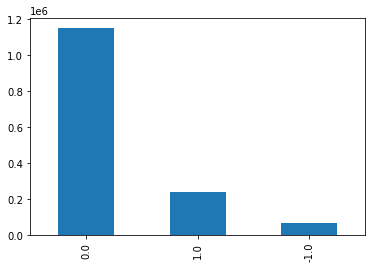

In [58]:
df['점수'].value_counts().plot(kind='bar') #점수 합 